In [1]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [3]:
import nltk

In [4]:
import konlpy

In [10]:
all_files = glob.glob('/Users/hoon/Desktop/빅데이터분석개론실습/실습/week12/data/report_data/myCabinetExcelData*.xls')

all_files #출력하여 내용 확인

['/Users/hoon/Desktop/빅데이터분석개론실습/실습/week12/data/report_data/myCabinetExcelData-4.xls',
 '/Users/hoon/Desktop/빅데이터분석개론실습/실습/week12/data/report_data/myCabinetExcelData-5.xls',
 '/Users/hoon/Desktop/빅데이터분석개론실습/실습/week12/data/report_data/myCabinetExcelData-2.xls',
 '/Users/hoon/Desktop/빅데이터분석개론실습/실습/week12/data/report_data/myCabinetExcelData-3.xls',
 '/Users/hoon/Desktop/빅데이터분석개론실습/실습/week12/data/report_data/myCabinetExcelData.xls']

In [11]:
all_files_data = [] #저장할 리스트 

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0] 

,제목,저자,발행기관,학술지명,권호사항,발행연도,작성언어,주제어,KDC,등재정보,...,발행기관 URL,수록면,KCI 피인용횟수,비고,중단사유,제공처,소장기관,국문 초록 (Abstract),다국어 초록 (Multilingual Abstract),목차
0,효율적인 클라우드 환경을 위한 가상화 및 SDN/NFV 기술 연구 = Virtual...,"김남용 ( Nam Yong Kim ), 문서연 ( Seo Yeon Moon ), 박...",한국정보처리학회,한국정보처리학회 학술대회논문집,Vol.24No.2[2017]\r\n,2017,NaN,NaN,NaN,NaN,...,NaN,318-321,NaN,NaN,NaN,KISS,NaN,최근 가상화 및 Software Defined Networking(SDN)/Netw...,NaN,NaN
1,멀티사이트 기반 클라우드 환경의 구성 자동화를 위한 SmartX 프로비저닝 프레임워크,"신준식(Jun-Sik Shin),김종원(JongWon Kim)",한국정보과학회,정보과학회 컴퓨팅의 실제 논문지(KIISE Transactions on Comput...,Vol.22No.11[2016]\r\n,2016,Korean,"자동 프로비저닝,오픈스택 클라우드,데브옵스 방법론,소프트웨어 정의 인프라,프레임워크...",NaN,KCI등재,...,NaN,547-558,0.0,NaN,NaN,"ScienceON, &nbsp;&nbsp; DBpia",영남대학교 과학도서관,다양한 ICT 인프라 기술들을 종합적으로 활용하는 클라우드의 대표적인 오픈소스 프로...,Construction of multi-site Cloud Infrastructur...,요약\r\nAbstract\r\n1. 서론\r\n2. 관련 기술 및 배경\r\n3....
2,K-Means Clustering 알고리즘 기반 클라우드 동적 자원 관리 기법에 관...,"곽민기 ( Minki Kwak ), 유헌창 ( Heonchang Yu )",한국정보처리학회,한국정보처리학회 학술대회논문집,Vol.28No.2[2021]\r\n,2021,NaN,NaN,NaN,NaN,...,NaN,107-110,NaN,NaN,NaN,KISS,NaN,글로벌 퍼블릭 클라우드 산업 규모는 매년 폭발적으로 성장하고 있으며 최근 COVID...,NaN,NaN
3,부산시 해양 클라우드 플랫폼 구축 연구,"김현주,김동현,김정현",한국해양교통학회,한국해양교통학회 학술대회자료집,Vol.2021No.2[2021]\r\n,2021,NaN,"조선,해양,클라우드,해운,항만",538.0,NaN,...,NaN,43-47,NaN,NaN,NaN,스콜라,NaN,"4차 산업혁명 시대가 도래함에 따라 산업적으로 공공부문에서 빅데이터, 인공지능, A...",NaN,NaN
4,시맨틱 데이터 클라우드 : 시맨틱 기술 기반 공공정보 배포 프레임워크 = Seman...,"김청림(Chungrim Kim),권용진(Yongjin Kwon),박재휘(Jaehui...",한국정보과학회,한국정보과학회 학술발표논문집,Vol.37No.2C[2010]\r\n,2010,Korean,NaN,4.0,NaN,...,http://www.kiise.or.kr,20-24,NaN,NaN,NaN,DBpia,NaN,e 정부 사업의 일환으로 공공정보를 민간에 제공하는 것에 대한 논의가 이루어지고 있...,NaN,요약\n1. 서론\n2. 공공정보 배포 현황 및 문제점\n3. 시맨틱 데이터 클라우...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,클라우드컴퓨팅 기반의 운동처방전문가시스템 설계 및 구현을 위한 융합 연구,"신승복,이원재",한국융합학회,한국융합학회논문지(Journal of the Korea Convergence Soc...,Vol.8No.10[2017]\r\n,2017,Korean,"융합, 운동처방, 퍼스널 트레이너, 클라우드컴퓨팅, 전문가시스템, Converge...",NaN,KCI등재,...,NaN,9-17,2.0,NaN,NaN,"ScienceON, &nbsp;&nbsp; KCI, &nbsp;&nbsp; eAr...",NaN,이 연구는 클라우드 컴퓨팅과 인공지능의 융합기술을 적용하여 운동처방전문가시스템을 개...,The current study attempted to develop and ope...,요약\r\n Abstract\r\n 1. 서론\r\n 2. 관련연구\r\n 2.1...
96,클라우드컴퓨팅과 오픈스택 활성화 방안에 관한 연구 = A Study on the A...,"이종섭,최주원,이남용",한국IT정책경영학회,한국IT정책경영학회 논문지(Jounal of The Korea Society of ...,Vol.13No.1[2021]\r\n,2021,Korean,"클라우드컴퓨팅,오픈스택,클라우드컴퓨팅법,클라우드 플랫폼,오픈소스,Cloud Comp...",NaN,KCI등재,...,NaN,2245-2249,0.0,NaN,NaN,KCI,NaN,NaN,"Cloud businesses, which had been promoted by p...",NaN
97,국방 클라우드컴퓨팅의 효과적 추진에 관한 탐색적 연구 = A Exploratory ...,"김기봉,김필성,정호석,신용태",한국IT정책경영학회,한국IT정책경영학회 논문지(Jounal of The Korea Society of ...,Vol.12No.6[2020]\r\n,2020,Korean,"클라우드,클라우드컴퓨팅,국방 클라우드컴퓨팅,국방통합데이터센터,Cloud,Cloud ...",NaN,KCI등재,...,NaN,2061-2067,0.0,NaN,NaN,KCI,NaN,NaN,"In order to win the war of the future, buildin...",NaN
98,클라우드 기반 교량 장기 모니터링 시스템 = Cloud-based Long-term...,"신준식 ( Shin Jun-sik ),박준영 ( Park Jun-young ),원종...",한국구조물진단유지관리공학회,한국구조물진단유지관리공학회 학술발표대회 논문집(N/A),Vol.25No.1[2021]\r\n,2021,NaN,"디지털 SOC,스마트 IoT 센서,클라우드,변위 융합 알고리즘,등가 중립축,Digi...",0.0,NaN,...,NaN,79-79,NaN,NaN,NaN,KISS,NaN,사회기반 시설물의 급격한 노후화에 대응하여 선제적 유지관리를 위한 디지털 SOC 시...,NaN,NaN


In [22]:
import pandas as pd

all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

all_files_data_concat #출력하여 내용 확인

,제목,저자,발행기관,학술지명,권호사항,발행연도,작성언어,주제어,KDC,등재정보,...,발행기관 URL,수록면,KCI 피인용횟수,비고,중단사유,제공처,소장기관,국문 초록 (Abstract),다국어 초록 (Multilingual Abstract),목차
0,효율적인 클라우드 환경을 위한 가상화 및 SDN/NFV 기술 연구 = Virtual...,"김남용 ( Nam Yong Kim ), 문서연 ( Seo Yeon Moon ), 박...",한국정보처리학회,한국정보처리학회 학술대회논문집,Vol.24No.2[2017]\r\n,2017,NaN,NaN,NaN,NaN,...,NaN,318-321,NaN,NaN,NaN,KISS,NaN,최근 가상화 및 Software Defined Networking(SDN)/Netw...,NaN,NaN
1,멀티사이트 기반 클라우드 환경의 구성 자동화를 위한 SmartX 프로비저닝 프레임워크,"신준식(Jun-Sik Shin),김종원(JongWon Kim)",한국정보과학회,정보과학회 컴퓨팅의 실제 논문지(KIISE Transactions on Comput...,Vol.22No.11[2016]\r\n,2016,Korean,"자동 프로비저닝,오픈스택 클라우드,데브옵스 방법론,소프트웨어 정의 인프라,프레임워크...",NaN,KCI등재,...,NaN,547-558,0.0,NaN,NaN,"ScienceON, &nbsp;&nbsp; DBpia",영남대학교 과학도서관,다양한 ICT 인프라 기술들을 종합적으로 활용하는 클라우드의 대표적인 오픈소스 프로...,Construction of multi-site Cloud Infrastructur...,요약\r\nAbstract\r\n1. 서론\r\n2. 관련 기술 및 배경\r\n3....
2,K-Means Clustering 알고리즘 기반 클라우드 동적 자원 관리 기법에 관...,"곽민기 ( Minki Kwak ), 유헌창 ( Heonchang Yu )",한국정보처리학회,한국정보처리학회 학술대회논문집,Vol.28No.2[2021]\r\n,2021,NaN,NaN,NaN,NaN,...,NaN,107-110,NaN,NaN,NaN,KISS,NaN,글로벌 퍼블릭 클라우드 산업 규모는 매년 폭발적으로 성장하고 있으며 최근 COVID...,NaN,NaN
3,부산시 해양 클라우드 플랫폼 구축 연구,"김현주,김동현,김정현",한국해양교통학회,한국해양교통학회 학술대회자료집,Vol.2021No.2[2021]\r\n,2021,NaN,"조선,해양,클라우드,해운,항만",538.0,NaN,...,NaN,43-47,NaN,NaN,NaN,스콜라,NaN,"4차 산업혁명 시대가 도래함에 따라 산업적으로 공공부문에서 빅데이터, 인공지능, A...",NaN,NaN
4,시맨틱 데이터 클라우드 : 시맨틱 기술 기반 공공정보 배포 프레임워크 = Seman...,"김청림(Chungrim Kim),권용진(Yongjin Kwon),박재휘(Jaehui...",한국정보과학회,한국정보과학회 학술발표논문집,Vol.37No.2C[2010]\r\n,2010,Korean,NaN,4.0,NaN,...,http://www.kiise.or.kr,20-24,NaN,NaN,NaN,DBpia,NaN,e 정부 사업의 일환으로 공공정보를 민간에 제공하는 것에 대한 논의가 이루어지고 있...,NaN,요약\n1. 서론\n2. 공공정보 배포 현황 및 문제점\n3. 시맨틱 데이터 클라우...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,기초지방자치단체의 클라우드 UPIS 도입 및 운영에 대한 연구,"임철현,홍일영",한국지도학회,한국지도학회지(Journal of the Korean Cartographic Ass...,Vol.18No.2[2018]\r\n,2018,Korean,"클라우드 컴퓨팅, 도시계획정보체계, UPIS, 클라우드 컴퓨팅 적합성 지수, Clo...",NaN,KCI등재,...,NaN,71-83,0.0,NaN,NaN,"코리아스칼라, &nbsp;&nbsp; eArticle",충남대학교 중앙도서관,"시스템 운영 및 유지보수의 간소화, 비용절감, 신속한 업무변화에 대한 대응을 위해 ...",Cloud computing are increasingly needed to sim...,요약\r\n Abstract\r\n I. 서론\r\n II. 도시계획정보시스템\r\...
496,클라우드 컴퓨팅과 민사상 증거보전에 관한 고찰 = A study on the Clo...,"김도훈(Kim, Do-Hoon)",원광대학교 법학연구소,圓光法學,Vol.29No.1[2013]\r\n,2013,NaN,"클라우드 컴퓨팅,전자적 자료,전자증거,증거보전,증거인멸\r\nCloud Comput...",360.0,KCI등재,...,NaN,7-34,1.0,NaN,NaN,"KCI, &nbsp;&nbsp; 스콜라",NaN,이메일의 등장과 활성화는 그리 오래 전의 일이 아니다. 하지만 아날로그가 주류를 이...,The conventional use of personal computers is ...,Ⅰ. 서 설\r\nⅡ. 클라우드 컴퓨팅과 전자증거\r\nⅢ. 클라우드 컴퓨팅 환경에...
497,학술세미나 발표논문 : 클라우드 컴퓨팅 환경에서 제기되는 개인정보 문제의 법적 고찰...,정원준 ( Won Joon Jeong ),단국대학교 법학연구소,법학논총(Dankook Law Review),Vol.40No.1[2016]\r\n,2016,Korean,"클라우드 컴퓨팅, 개인정보보호법, 클라우드발전법, 데이터 제공자, 데이터 이용자, ...",NaN,KCI등재,...,NaN,3-28,NaN,NaN,NaN,"KCI, &nbsp;&nbsp; KISS",충남대학교 중앙도서관,2015년 3월 27일 경제활성화법 일환으로 지속 논의되어 온 「클라우드 컴퓨팅 발...,It is very important value that individuals ha...,NaN
498,OpenStack 클라우드 네트워크 기술 분석 = Analysis of OpenSt...,"박종근,최강일,이상민,이정희,이범철,Park, J.G.,Choi, G.I.,Lee,...",한국전자통신연구원,전자통신동향분석(Electronics and telecommunications tr...,Vol.28No.5[2013]\r\n,2013,Korean,NaN,NaN,NaN,...,NaN,122-132,NaN,NaN,NaN,ScienceON,동국대학교 중앙도서관,오늘날 클라우드 서비스가 확산되면서 공용 클라우드 뿐만 아니라 사설 클라우드나 하이...,NaN,NaN


In [14]:
all_files_data_concat.to_csv('/Users/hoon/Desktop/빅데이터분석개론실습/실습/week12/data/report_data/riss_cloud.csv', encoding='utf-8', index = False)

In [35]:
# 제목 추출
all_Abstract = all_files_data_concat['국문 초록 (Abstract)']

all_Abstract #출력하여 내용 확인

0      최근 가상화 및 Software Defined Networking(SDN)/Netw...
1      다양한 ICT 인프라 기술들을 종합적으로 활용하는 클라우드의 대표적인 오픈소스 프로...
2      글로벌 퍼블릭 클라우드 산업 규모는 매년 폭발적으로 성장하고 있으며 최근 COVID...
3      4차 산업혁명 시대가 도래함에 따라 산업적으로 공공부문에서 빅데이터, 인공지능, A...
4      e 정부 사업의 일환으로 공공정보를 민간에 제공하는 것에 대한 논의가 이루어지고 있...
                             ...                        
495    시스템 운영 및 유지보수의 간소화, 비용절감, 신속한 업무변화에 대한 대응을 위해 ...
496    이메일의 등장과 활성화는 그리 오래 전의 일이 아니다. 하지만 아날로그가 주류를 이...
497    2015년 3월 27일 경제활성화법 일환으로 지속 논의되어 온 「클라우드 컴퓨팅 발...
498    오늘날 클라우드 서비스가 확산되면서 공용 클라우드 뿐만 아니라 사설 클라우드나 하이...
499    오늘날 클라우드(cloud) 시스템의 활용도가 높아지면서, 수사과정에서도 클라우드압...
Name: 국문 초록 (Abstract), Length: 500, dtype: object

In [79]:
all_Abstract  #출력하여 내용 확인
all_Abstract.to_csv('/Users/hoon/Desktop/빅데이터분석개론실습/실습/week12/data/report_data/riss_cloud.csv',
                             encoding='utf-8', index=False)

In [92]:
df_초록 = pd.read_csv('/Users/hoon/Desktop/빅데이터분석개론실습/실습/week12/data/report_data/riss_cloud.csv', names=['abstract'], header=0)

In [93]:
df_초록.head()

,abstract
0,최근 가상화 및 Software Defined Networking(SDN)/Netw...
1,다양한 ICT 인프라 기술들을 종합적으로 활용하는 클라우드의 대표적인 오픈소스 프로...
2,글로벌 퍼블릭 클라우드 산업 규모는 매년 폭발적으로 성장하고 있으며 최근 COVID...
3,"4차 산업혁명 시대가 도래함에 따라 산업적으로 공공부문에서 빅데이터, 인공지능, A..."
4,e 정부 사업의 일환으로 공공정보를 민간에 제공하는 것에 대한 논의가 이루어지고 있...


In [94]:
df_초록.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   abstract  451 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


In [95]:
df_초록 = df_초록.fillna('초록이 없습니다')

In [96]:
df_초록.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   abstract  500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


In [97]:
text = df_초록.abstract.to_list()
text[0]

'최근 가상화 및 Software Defined Networking(SDN)/Network Functions Virtualization(NFV) 기술의 등장으로 클라우드에 효율적이면서 경제적인 기술을 적용하는 추세이다. 각 분야의 기업은 클라우드에 가상화 기술을 활용함으로써 IT분야에서 시간과 비용 모두 감소시키며, 운영 효율성 및 유연성을 향상시키는 기술로 채택하고 있다. 본 논문에서는 네트워크 관련 연구를 통해 효율적인 클라우드 환경을 위한 가상화 기술 및 SDN/NFV에 대해 논의한다. 효율적인 클라우드 환경은 기존 네트워크 환경에서 가상화 및 SDN/NFV를 접목시킬 수 있는 이점이 있다. 본 논문을 통해 미래 IT에 효율적인 클라우드 환경을 위해 다양한 가상화 및 SDN/NFV 기술에 대해 연구가 필요하다.'

In [98]:
len(text)

500

In [99]:
nlp = Okt()
nlp.nouns(text[0])

['최근',
 '가상화',
 '및',
 '기술',
 '등장',
 '클라우드',
 '효율',
 '면서',
 '경제',
 '기술',
 '적용',
 '추세',
 '각',
 '분야',
 '기업',
 '클라우드',
 '가상화',
 '기술',
 '활용',
 '함',
 '분야',
 '시간',
 '비용',
 '모두',
 '감소',
 '운영',
 '효율',
 '및',
 '유연성',
 '향상',
 '기술',
 '채택',
 '논문',
 '네트워크',
 '관련',
 '연구',
 '통해',
 '효율',
 '클라우드',
 '환경',
 '위',
 '가상화',
 '기술',
 '및',
 '대해',
 '논의',
 '효율',
 '클라우드',
 '환경',
 '기존',
 '네트워크',
 '환경',
 '가상화',
 '및',
 '를',
 '접목',
 '수',
 '이점',
 '논문',
 '통해',
 '미래',
 '효율',
 '클라우드',
 '환경',
 '위해',
 '가상화',
 '및',
 '기술',
 '대해',
 '연구']

In [100]:
nouns=[]
stop_words = '초록이 없습니다'
stop_words=stop_words.split(' ')

for words in text:
    for noun in nlp.nouns(words):
        if noun not in stop_words and len(noun) >=2:
            nouns.append(noun)

In [101]:
print(len(nouns))

44176


In [102]:
count = Counter(nouns)

count   #출력하여 내용 확인

Counter({'최근': 145,
         '가상화': 73,
         '기술': 566,
         '등장': 22,
         '클라우드': 2520,
         '효율': 177,
         '면서': 3,
         '경제': 22,
         '적용': 196,
         '추세': 17,
         '분야': 142,
         '기업': 140,
         '활용': 306,
         '시간': 89,
         '비용': 129,
         '모두': 28,
         '감소': 31,
         '운영': 98,
         '유연성': 11,
         '향상': 68,
         '채택': 16,
         '논문': 323,
         '네트워크': 148,
         '관련': 169,
         '연구': 365,
         '통해': 269,
         '환경': 422,
         '대해': 104,
         '논의': 41,
         '기존': 182,
         '접목': 17,
         '이점': 12,
         '미래': 19,
         '위해': 294,
         '인프라': 87,
         '종합': 10,
         '대표': 26,
         '오픈소스': 25,
         '프로젝트': 19,
         '오픈스택': 9,
         '멀티': 37,
         '사이트': 8,
         '기반': 343,
         '구축': 163,
         '설치': 16,
         '복잡': 8,
         '지리': 4,
         '제약': 17,
         '인적': 2,
         '포한': 1,
         '해소': 9,
    

In [112]:
top_nouns = dict(count.most_common(50))
top_nouns

{'클라우드': 2520,
 '서비스': 1094,
 '컴퓨팅': 775,
 '기술': 566,
 '데이터': 555,
 '환경': 422,
 '제공': 410,
 '정보': 403,
 '시스템': 399,
 '연구': 365,
 '기반': 343,
 '대한': 329,
 '논문': 323,
 '제안': 322,
 '이용': 318,
 '사용': 315,
 '사용자': 312,
 '활용': 306,
 '분석': 300,
 '위해': 294,
 '자원': 293,
 '통해': 269,
 '관리': 220,
 '모바일': 219,
 '보안': 214,
 '방법': 202,
 '포인트': 199,
 '모델': 197,
 '적용': 196,
 '기법': 184,
 '기존': 182,
 '효율': 177,
 '결과': 173,
 '관련': 169,
 '구축': 163,
 '처리': 162,
 '저장': 161,
 '문제': 157,
 '산업': 151,
 '또한': 151,
 '네트워크': 148,
 '최근': 145,
 '이용자': 145,
 '분야': 142,
 '제시': 142,
 '기업': 140,
 '개발': 138,
 '플랫폼': 138,
 '경우': 136,
 '서버': 130}

In [113]:
del top_nouns['연구']
del top_nouns['분석']

In [114]:
font_path = "/Library/Fonts/Arial Unicode.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)

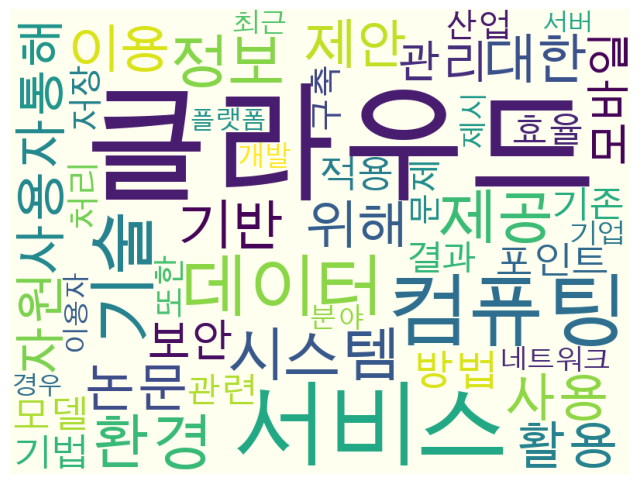

In [115]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(top_nouns)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()